# Dynamics with policy

Startup run in 7.7660071849823 secs.


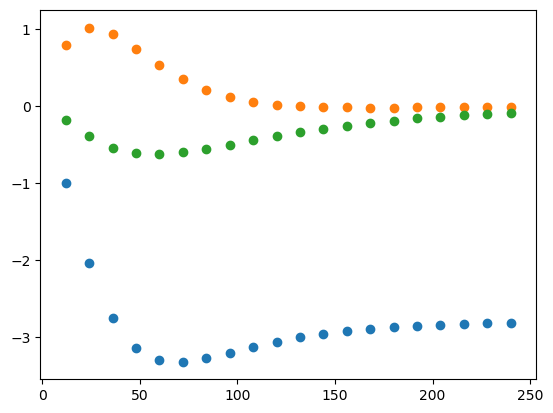

false

In [1]:
using NBInclude
_VERS_ = :base
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/policy")
_tosave = false

In [2]:
### define counterfactuals
function cost(s::SimPar, p::StrucPar, pp::PolicyPar)
    data = simulate_policy(pp.subdur, simpar, p, pp)[:,[:t,:d,:n]]
    total1 = 0
    total2 = 0
    for i in 1:(length(data[:,:t])-1)
        delta_t = data.t[i+1] - data.t[i]
        total1 += (data.d[i]+data.d[i+1])/2 * delta_t
        total2 += (data.n[i]+data.n[i+1])/2 * delta_t
    end
    totalcost = total1 * pp.gw + total2 * pp.gf
    return totalcost
end

subdur = 12*5 ## 5 years
costtargetA = subdur * p.m_star * 0.01 ## 1% of gross output over subdur
costtargetB = subdur * p.m_star * 0.02 ## 2% of gross output over subdur

@time pp1 = let
    function tozero(gw)
        pp = PolicyPar(gw=gw, gf=0, subdur=subdur)
        diff = cost(simpar, p, pp)-costtargetA
        print("$diff ")
        return cost(simpar, p, pp)-costtargetA
    end
    gw = find_zero(tozero,0.006)
    println()
    println("The subsidy to workers is $gw, which represents $(gw/p.H_star) of the cost of living")
    PolicyPar(gw=gw, gf=0, subdur=subdur)
end

@time pp2 = let
    function tozero(gw)
        pp = PolicyPar(gw=gw, gf=0, subdur=subdur)
        diff = cost(simpar, p, pp)-costtargetB
        print("$diff ")
        return cost(simpar, p, pp)-costtargetB
    end
    gw = find_zero(tozero,0.012)
    println()
    println("The subsidy to workers is $gw, which represents $(gw/p.H_star) of the cost of living")
    PolicyPar(gw=gw, gf=0, subdur=subdur)
end

@time pp3 = let
    function tozero(gf)
        pp = PolicyPar(gw=0, gf=gf, subdur=subdur)
        diff = cost(simpar, p, pp)-costtargetA
        print("$diff ")
        return cost(simpar, p, pp)-costtargetA
    end
    gf = find_zero(tozero,0.01)
    println()
    println("The subsidy to firms is $gf")
    PolicyPar(gw=0, gf=gf, subdur=subdur)
end

@time pp4 = let
    function tozero(gf)
        pp = PolicyPar(gw=0, gf=gf, subdur=subdur)
        diff = cost(simpar, p, pp)-costtargetB
        print("$diff ")
        return cost(simpar, p, pp)-costtargetB
    end
    gf = find_zero(tozero,0.02)
    println()
    println("The subsidy to firms is $gf")
    PolicyPar(gw=0, gf=gf, subdur=subdur)
end

0.002426294117724659 0.002053939816474726 1.0694246987963396e-8 1.0694246987963396e-8 4.701794509287538e-14 -2.0432258135971715e-6 -1.1102230246251565e-16 1.1102230246251565e-16 0.0 
The subsidy to workers is 0.005966597393461259, which represents 0.04111318118715938 of the cost of living
208.449558 seconds (73.31 M allocations: 177.357 GiB, 8.20% gc time, 4.75% compilation time)
0.005065079419924734 0.004692129355522878 5.1892733887726195e-8 5.1892733887726195e-8 5.312417172831374e-13 -4.640136613720536e-6 -7.771561172376096e-16 0.0 
The subsidy to workers is 0.011923814755339653, which represents 0.08216172872928176 of the cost of living
178.112890 seconds (56.90 M allocations: 157.136 GiB, 8.37% gc time, 0.23% compilation time)
0.011184754195091795 0.010954941696295684 1.6283542434436526e-6 1.6283542434436526e-6 2.372872454081687e-10 -9.323361598201352e-6 -2.0233814623793478e-13 5.551115123125783e-17 -1.1102230246251565e-16 0.0 
The subsidy to firms is 0.009711299349844538
197.38463

PolicyPar(0.0, 0.019328067979285414, 60.0)

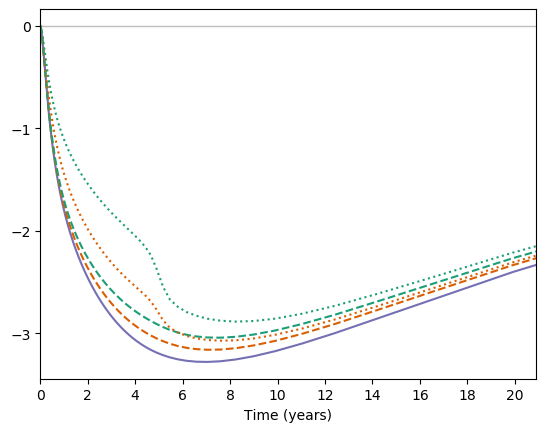

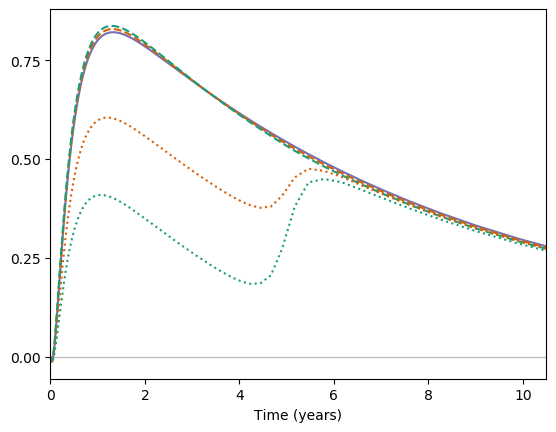

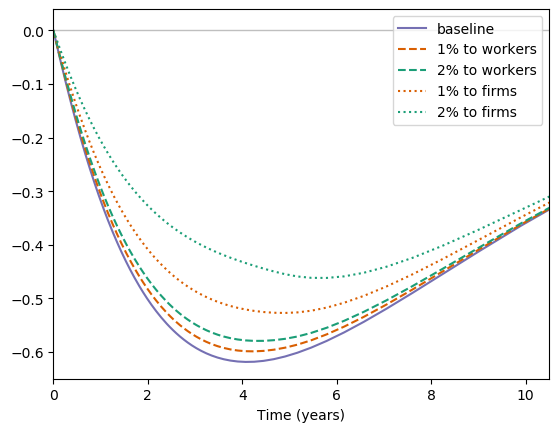

()

In [3]:
tab =[simulate(250, simpar, p)]
for mypp in [pp1,pp2, pp3, pp4]
    mysimu = simulate_policy(250, simpar, p, mypp)
    push!(tab, mysimu)
end


mylabel = ["baseline", "1% to workers", "2% to workers","1% to firms", "2% to firms"]
mycol = [myblue, myred, mygreen, myred, mygreen]
mysty = ["-","--","--",":",":"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.m ./p.m_star .- 1) .* 100 , 
             c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
#legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment1.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((p.l_star-p.m_star)/(p.l_star)) ) .* 100 , 
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate1.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (p.l_star/p.d_star) ) .* 100 ,  
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate1.png")) : ()

# Play with duration

In [4]:
subdur2 = 12*10

@time pp1_extra = let
    function tozero(gw)
        pp = PolicyPar(gw=gw, gf=0, subdur=subdur2)
        diff = cost(simpar, p, pp)-costtargetA
        print("$diff ")
        return cost(simpar, p, pp)-costtargetA
    end
    gw = find_zero(tozero,0.006)
    println(gw)
    PolicyPar(gw=gw, gf=0, subdur=subdur2)
end

@time pp3_extra = let
    function tozero(gf)
        pp = PolicyPar(gw=0, gf=gf, subdur=subdur2)
        diff = cost(simpar, p, pp)-costtargetA
        print("$diff ")
        return cost(simpar, p, pp)-costtargetA
    end
    gf = find_zero(tozero,0.01)
    println(gf)
    PolicyPar(gw=0, gf=gf, subdur=subdur2)
end

0.417183091949543 0.416390655017348 0.0006195474107358878 0.33716969293756355 0.0005004252034478962 0.0005004252034478962 5.995616603748921e-7 5.995616603748921e-7 1.0633161018347437e-12 1.0633161018347437e-12 1.6653345369377348e-16 -5.984973072692412e-10 1.6653345369377348e-16 -5.551115123125783e-17 5.551115123125783e-17 0.0 0.002813377270414314
323.028871 seconds (113.48 M allocations: 314.248 GiB, 8.51% gc time, 0.12% compilation time)
0.43909339358149796 0.43860162197617797 0.0020009472675429074 0.38944965300244677 0.0017782129981043782 0.0017782129981043782 7.340932823673985e-6 7.340932823673985e-6 1.4070972165214357e-10 1.4070972165214357e-10 0.0 0.004574389422288178
214.704074 seconds (78.05 M allocations: 216.048 GiB, 8.71% gc time, 0.09% compilation time)


PolicyPar(0.0, 0.004574389422288178, 120.0)

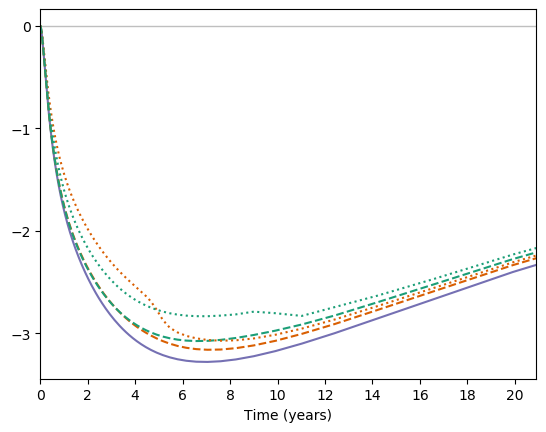

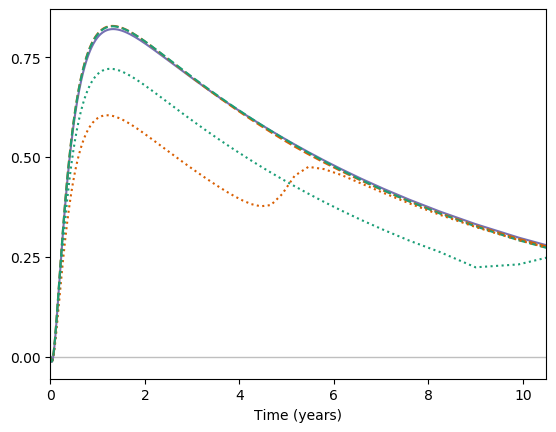

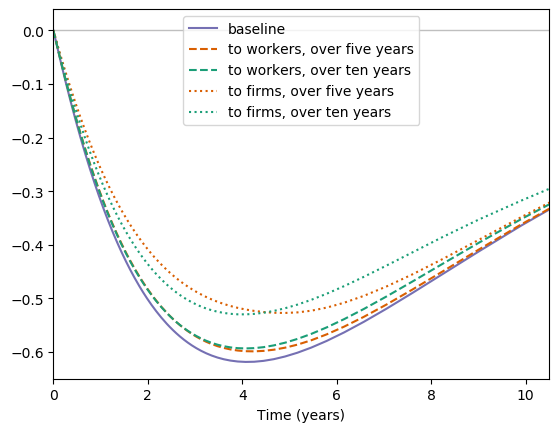

()

In [5]:
tab =[simulate(250, simpar, p)]
for mypp in [pp1,pp1_extra, pp3, pp3_extra]
    mysimu = simulate_policy(250, simpar, p, mypp)
    push!(tab, mysimu)
end



mylabel = ["baseline", "to workers, over five years", "to workers, over ten years",
            "to firms, over five years", "to firms, over ten years"]
mycol = [myblue, myred, mygreen, myred, mygreen]
mysty = ["-","--","--",":",":"]


### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.m ./p.m_star .- 1) .* 100 , 
             c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
#legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment2.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((p.l_star-p.m_star)/(p.l_star)) ) .* 100 , 
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate2.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
i=1
for mysimu in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (p.l_star/p.d_star) ) .* 100 ,  
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
legend(loc=9)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate2.png")) : ()